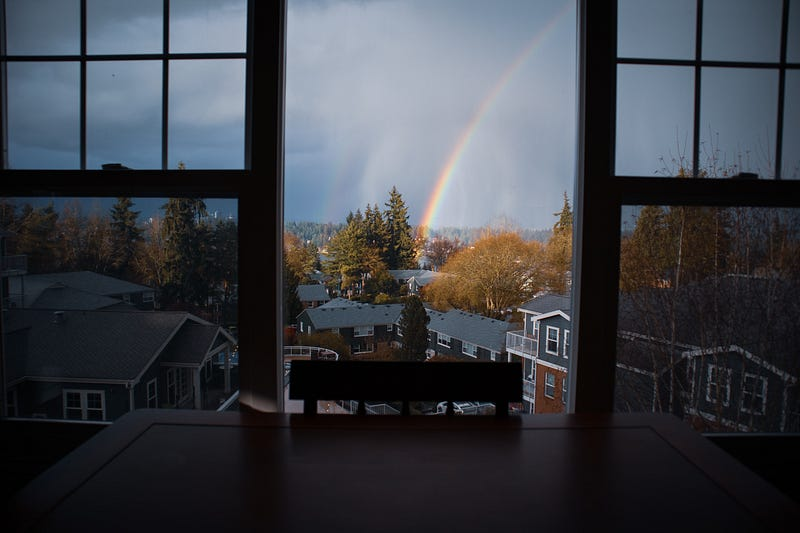

# King County Home Sales Linear Regression Analysis

**Authors:**
<P>
Clara Giurgiu<p>
Stephanie Ciaccia

## Overview
Panda Real Estate is a residential real estate firm that prioritizes leveraging technology to enhance and optimize their real estate portfolio. Historically operating in the greater New York City Area, Panda Real Estate has decided to expand it's portfolio to the west coast, to include properties in King County, Washington.

## Business Problem
As Panda Real Estate expands it's market to the greater Seattle Metropolitan area, we will be identifying the key variables that influence residential home prices in King County, Washington. 
<p>
We will provide a comprehensive analysis of the residential housing market that internal teams can leverage while exploring investment opportunities.

## Data Understanding - Source #1: Kings County Home Sales
We have sourced data on home sales in King County, WA. One of our datasets was pulled from King County's official website and consists of data from 2021-2022 with over 30 thousands home attributes and selling prices. 
We also used a dataset from Fred Econimic Data to look at mortgage rates at the time of sale from King County dataset. 

In [1]:
# Import standard packages
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import datetime
%matplotlib inline

In [2]:
# importing King County website data and looking at first 5 rows.
kc_data = pd.read_csv('Data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# overview of dataframe
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains slightly over 30,000 entries and 25 rows of information on home sales in King County, Washington, USA. 
15 out of the 25 columns are numeric and 10 contain string values. 
We can see that there are very few nulls in heat_source and sewer_system colums. 
The target column, price, does not have any nulls, is in the correct format (float) and ranges from \\$27K to $30M. 

In [4]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M, number of bedrooms ranges from 0 to 13, bathrooms from 0 to 10.5, which could be indicative of outliers.
The min sqft_living is 3 which seems odd for a home and could be an incorrect entry.

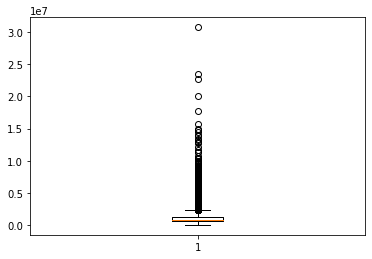

In [5]:
# plotting boxplot
plt.boxplot(x='price',data=kc_data);

Our target variable is slightly right skewed. It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [6]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


In [7]:
# checking for nulls and taking the sum
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

## Data Understanding - Source #2: Monthly Fixed Rate Mortgage Average


This dataset was pulled from "Economic Research - Federal Reserve Bank of St. Louis". In includes monthly mortage rates from the past 30 years. The information is sourced from Freddie Mac, 

https://fred.stlouisfed.org/series/MORTGAGE30US

In [52]:
#importing data and converting data to dataframe

mortgage_rates = pd.read_csv("Data/MORTGAGE30US.csv")

In [53]:
# looking at datatypes
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          279 non-null    object 
 1   MORTGAGE30US  279 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [54]:
#looking at average interest rates
mortgage_rates.describe()

,MORTGAGE30US
count,279.00
mean,5.02
std,1.36
min,2.68
25%,3.90
50%,4.84
75%,6.14
max,8.52


In [55]:
# checking for nulls
mortgage_rates.isna().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

## Data Preparation -  Source #1: Kings County Home Sales


In [13]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [14]:
# sanity check
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [15]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(kc_data['date'])
kc_data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.00,30111,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,2021-11-21 01:16:22.405101312,1108970.65,3.42,2.34,2113.34,16648.80,1.54,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32
min,1000055.00,2021-06-10 00:00:00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2070850032.50,2021-08-18 00:00:00,649236.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3876000200.00,2021-11-03 00:00:00,860000.00,3.00,2.50,1920.00,7477.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,2022-03-07 00:00:00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,2022-06-09 00:00:00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07
std,2882235761.32,NaN,896515.83,0.98,0.89,973.45,59933.03,0.57,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72


We are working with data from June 2021 to June 2022.

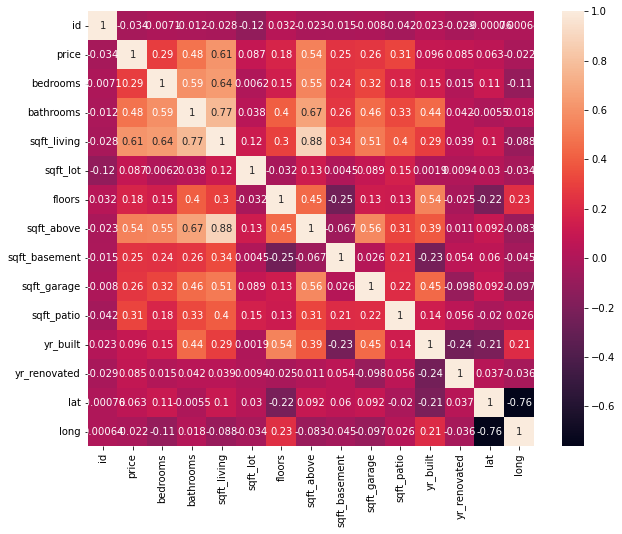

In [16]:
# looking at corr of numeric variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(kc_data.corr(), annot=True)
plt.show()

The strongest positive correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms.
The least correlated ones are yr_built, yr_renovated and lat & long.

Although small, we can see a positive trend between home square footage and prices.

In [ ]:
# removing least correlated columns and ID column
kc_data = kc_data.drop(columns=['id','yr_built','yr_renovated', 'lat', 'long'])
kc_data.head()

In [ ]:
# firltering homes where price is less than $25M
kc_data = kc_data.loc[kc_data['price'] <= 25000000]
kc_data.describe()

There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [ ]:
kc_data = kc_data.loc[kc_data['sqft_living'] > 500]

In [ ]:
kc_data.info()

In [ ]:
# exploring string columns
kc_data.describe(include='object')

The waterfront, greenbelt, and nuisance columns seem to be boolean. Out of the 9 columns, we can separate the addresses to group by city or zip code.

In [18]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
10836 Northeast 135th Place, Kirkland, Washington 98034, United States           1
2007 14th Avenue East, Seattle, Washington 98112, United States                  1
8549A Midvale Ave N, Seattle, Washington 98103, United States                    1
3389 Wynalda Drive, Enumclaw, Washington 98022, United States                    1
24828 145th Lane Southeast, Kent, Washington 98042, United States                1
Name: address, Length: 29519, dtype: int64

Interestingly, it looks like there are entries for homes with addresses outside of Washington state. Will will filter out homes in WA only

In [19]:
# filtering homes that have "Washington" in the address
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29208 non-null  int64         
 1   date           29208 non-null  datetime64[ns]
 2   price          29208 non-null  float64       
 3   bedrooms       29208 non-null  int64         
 4   bathrooms      29208 non-null  float64       
 5   sqft_living    29208 non-null  int64         
 6   sqft_lot       29208 non-null  int64         
 7   floors         29208 non-null  float64       
 8   waterfront     29208 non-null  object        
 9   greenbelt      29208 non-null  object        
 10  nuisance       29208 non-null  object        
 11  view           29208 non-null  object        
 12  condition      29208 non-null  object        
 13  grade          29208 non-null  object        
 14  heat_source    29208 non-null  object        
 15  sewer_system   2920

We now have 29,136 entries that are only in Washington state.

We also want to isolate cities and zipcodes.

In [20]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_renovated,address,lat,long,0,1,2,3,4,5
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [21]:
wa_only_df.drop(columns=['address',0,3,4,5], inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,1,2
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,Washington 98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,Washington 98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,Washington 98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,Washington 98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,Washington 98027


In [22]:
wa_only_df.rename(columns={1:'city', 2:'state_zip'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,state_zip
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,Washington 98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,Washington 98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,Washington 98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,Washington 98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,Washington 98027


In [23]:
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,lat,long,city,state_zip,0,1,2
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,40,1969,0,47.46,-122.19,Renton,Washington 98055,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,240,1950,0,47.71,-122.36,Seattle,Washington 98133,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,0,1956,0,47.50,-122.23,Seattle,Washington 98178,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,270,2010,0,47.57,-122.29,Seattle,Washington 98118,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,30,2012,0,47.53,-122.07,Issaquah,Washington 98027,,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,NO,NO,...,210,1921,0,47.66,-122.33,Seattle,Washington 98103,,Washington,98103
30151,194000695,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,NO,NO,...,520,2011,0,47.57,-122.39,Seattle,Washington 98116,,Washington,98116
30152,7960100080,2022-05-27,800000.00,3,2.00,1620,3600,1.00,NO,NO,...,110,1995,0,47.61,-122.30,Seattle,Washington 98122,,Washington,98122
30153,2781280080,2022-02-24,775000.00,3,2.50,2570,2889,2.00,NO,NO,...,100,2006,0,47.45,-122.19,Renton,Washington 98055,,Washington,98055


In [24]:
# Renaming zip column
wa_only_df.rename(columns={2:'zip_code'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,lat,long,city,state_zip,0,1,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,40,1969,0,47.46,-122.19,Renton,Washington 98055,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,240,1950,0,47.71,-122.36,Seattle,Washington 98133,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,0,1956,0,47.50,-122.23,Seattle,Washington 98178,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,270,2010,0,47.57,-122.29,Seattle,Washington 98118,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,30,2012,0,47.53,-122.07,Issaquah,Washington 98027,,Washington,98027


In [25]:
wa_only_df.drop(columns=['state_zip', 0,1], inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,98027


After formatting the address column to isolate by zipcode, we want to look into other columns that may not be useful in our analysis.

In [26]:
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29208 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29208 non-null  int64         
 1   date           29208 non-null  datetime64[ns]
 2   price          29208 non-null  float64       
 3   bedrooms       29208 non-null  int64         
 4   bathrooms      29208 non-null  float64       
 5   sqft_living    29208 non-null  int64         
 6   sqft_lot       29208 non-null  int64         
 7   floors         29208 non-null  float64       
 8   waterfront     29208 non-null  object        
 9   greenbelt      29208 non-null  object        
 10  nuisance       29208 non-null  object        
 11  view           29208 non-null  object        
 12  condition      29208 non-null  object        
 13  grade          29208 non-null  object        
 14  heat_source    29208 non-null  object        
 15  sewer_system   2920

After separating address column, there are 4 nulls in the new column, zip_code that will have to be removed. We will also check that the formating was done properly on the new columns.

In [27]:
wa_only_df['city'].unique()

array([' Renton', ' Seattle', ' Issaquah', ' Shoreline', ' Burien',
       ' Kent', ' Federal Way', ' Duvall', ' Auburn', ' Bellevue',
       ' Maple Valley', ' Woodinville', ' Redmond', ' Medina',
       ' Lake Forest Park', ' SeaTac', ' Clyde Hill', ' North Bend',
       ' Bothell', ' Kirkland', ' Des Moines', ' Newcastle',
       ' Mercer Island', ' Carnation', ' Sammamish', ' Snoqualmie',
       ' Enumclaw', ' Covington', ' Fall City', ' Normandy Park',
       ' Algona', ' Kenmore', ' Tukwila', ' Black Diamond', ' Pacific',
       ' Vashon', ' Hunts Point', ' Ravensdale', ' Dilworth',
       ' Beaux Arts', ' Preston', ' Skykomish', ' Milton', ' Monroe',
       ' Ames Lake', ' Yarrow Point', ' Snohomish', ' Lakeland North',
       ' Tulalip', ' Hobart', ' White Center', ' Washington',
       ' 35th Ave SW & SW Holden', ' Spanaway', ' Baring', ' Arlington',
       ' Eatonville', ' Puyallup', ' Vancouver', ' Spokane',
       ' Marysville', ' Union Hill-Novelty Hill', ' Clarkston',
   

We noticed that the city column values had a whitespace in front and there are a few that look like street addresses. 

In [28]:
# removing space in front of city name
wa_only_df['city'] = wa_only_df['city'].str.strip()

In [29]:
cities = wa_only_df['city'].unique()
print(sorted(cities))

['2301 NE Northlake Way', '35th Ave SW & SW Holden', 'Algona', 'Ames Lake', 'Arlington', 'Auburn', 'Baring', 'Beaux Arts', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clarkston', 'Clyde Hill', 'Cottage Lake', 'Covington', 'Dash Point', 'Des Moines', 'Dilworth', 'Duvall', 'Eatonville', 'Enumclaw', 'Fairwood', 'Fall City', 'Federal Way', 'Hobart', 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Lakeland North', 'Maple Valley', 'Marysville', 'Medina', 'Mercer Island', 'Milton', 'Monroe', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Puyallup', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snohomish', 'Snoqualmie', 'Snoqualmie Pass', 'Spanaway', 'Spokane', 'Tukwila', 'Tulalip', 'Union Hill-Novelty Hill', 'Vancouver', 'Vashon', 'Washington', 'White Center', 'Woodinville', 'Yarrow Point']


In [30]:
wa_only_df.loc[wa_only_df['city'] == '2301 NE Northlake Way']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
19560,4083306403,2022-02-22,1205000.00,3,2.00,1400,1445,2.00,NO,NO,...,1140,510,250,460,2016,0,47.65,-122.33,2301 NE Northlake Way,None


In [31]:
wa_only_df.loc[wa_only_df['city'] == '35th Ave SW & SW Holden']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
4818,139000091,2022-04-06,1180000.00,2,2.50,1260,700,2.00,NO,NO,...,840,420,0,390,2018,0,47.53,-122.38,35th Ave SW & SW Holden,None
17496,139000123,2021-10-20,1200000.00,3,2.50,1310,1251,2.00,NO,NO,...,1100,390,180,520,2021,0,47.53,-122.38,35th Ave SW & SW Holden,None
26031,139000125,2022-01-25,1030000.00,3,2.50,1360,2227,2.00,NO,NO,...,960,400,0,400,2021,0,47.53,-122.38,35th Ave SW & SW Holden,None


After a quick search at the cities that have addresses one is a boat and 3 other entries point to a bus stop, we will remove these from out set.
Additionally, the cities list may reflect names of further jurisdiction within the cities. For example, 'Ames Lake' is located in the city of 'Carnation. This can potentially skew an analysis if looking into the cities. We will try to avoid that. 

In [32]:
# dropping rows with incorrect cities
# thought of replacing it but it might need more code
wa_only_df = wa_only_df.drop([19560,4818,17496,26031])

In [33]:
wa_only_df['zip_code'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', '98387', '15301', '98251', '98223',
       '98338', '98224', '98372', '98663', '99202', '99403', '98422',
       '99203', '99223', '98270'], dtype=object)

In [34]:
wa_only_df['zip_code'].describe()

count     29204
unique       94
top       98042
freq        992
Name: zip_code, dtype: object

In [35]:
#checking for nulls
wa_only_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
lat              0
long             0
city             0
zip_code         0
dtype: int64

After searching through all of the zipcodes there were 21 that were not in King County.

In [36]:
#dropping all non King County zipcodes
non_kings_county = [98288, 98354, 98272, 98296, 98271, 98050, 63090, 98387, 15301,
                    98251, 98223, 98338, 98224, 98372, 98663, 99202, 99403, 98422,
                    99203, 99223, 98270]

for temp in non_kings_county:
    wa_only_df.drop(wa_only_df[wa_only_df.zip_code == f'{temp}'].index, inplace=True)


In [43]:
#sanity check to double check that the numbers were removed
sanity_county = [98354, 98272, 98296, 98271, 98050, 63090, 98387, 15301,
                    98251, 98223, 98338, 98224, 98372, 98663, 99202, 99403, 98422,
                    99203, 99223, 98270]

for test_var in non_kings_county:
    if not wa_only_df.loc[wa_only_df['zip_code'] == f'{test_var}'].empty:
        print('fail')

In [44]:
#checking to see how many zipcodes were lost - 21
wa_only_df['zip_code'].describe()

count     29124
unique       73
top       98042
freq        992
Name: zip_code, dtype: object

We now have 73 unique zip codes to use for our multiple linear regression models.

## Data Preparation - Source #2: Monthly Fixed Rate Mortgage Average


Cleaning the mothly fixed rate mortgage dataset

In [56]:
mortgage_rates

,DATE,MORTGAGE30US
0,1/1/00,8.21
1,2/1/00,8.32
2,3/1/00,8.24
3,4/1/00,8.15
4,5/1/00,8.52
...,...,...
274,11/1/22,6.80
275,12/1/22,6.36
276,1/1/23,6.27
277,2/1/23,6.26


In [57]:
#changing the datatype of date to datetime
mortgage_rates["DATE"]= pd.to_datetime(mortgage_rates["DATE"])

#changing the column titles
mortgage_rates.rename(columns = {'DATE':'month', 'MORTGAGE30US': 'mortgage_rate'}, inplace = True)

In [58]:
#sanity check
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          279 non-null    datetime64[ns]
 1   mortgage_rate  279 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [59]:
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          279 non-null    datetime64[ns]
 1   mortgage_rate  279 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [60]:
#changing date to month and year so we can use this as a unique identifier when adding in the mortage rates
mortgage_rates['month'] = mortgage_rates['month'].dt.strftime('%B %Y')

In [49]:
#renaming final dataframe and sanity checking values
mortg = mortgage_rates
mortg

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52
...,...,...
274,November 2022,6.80
275,December 2022,6.36
276,January 2023,6.27
277,February 2023,6.26


In [50]:
#sanity checking values
mortg.isna().sum()

month            0
mortgage_rate    0
dtype: int64

Now we can start looking at our categorical columns.

After cleaning data, we want to look at columns most correlated to the target, price.

In [61]:
house_corrs = wa_only_df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price           1.00
sqft_living     0.62
sqft_above      0.55
bathrooms       0.49
sqft_patio      0.32
lat             0.30
bedrooms        0.29
sqft_garage     0.27
sqft_basement   0.25
floors          0.20
yr_built        0.11
sqft_lot        0.09
yr_renovated    0.09
long            0.09
id              0.03
Name: price, dtype: float64

We will used to top 9 most positively correlated columns for our features in the models.

In [62]:
cate_features = [feature for feature in wa_only_df.columns if wa_only_df[feature].dtypes=='O']
cate_features

['waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'city',
 'zip_code']

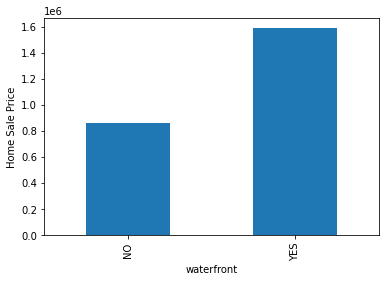

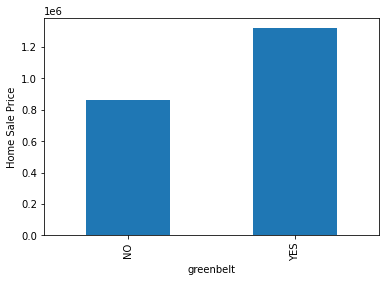

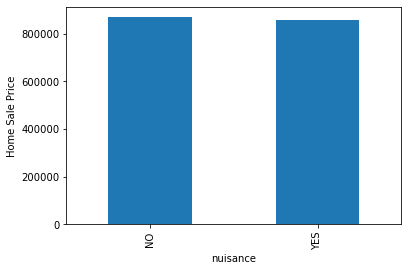

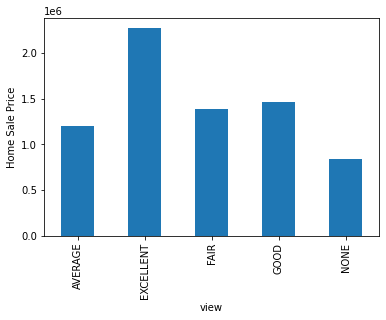

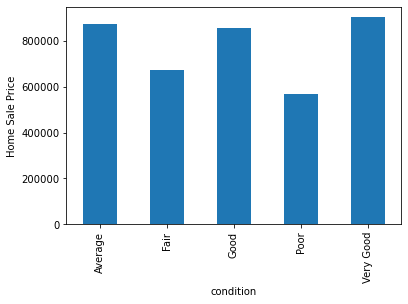

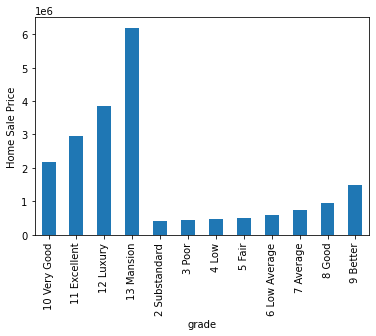

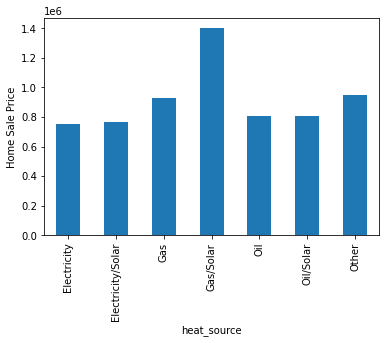

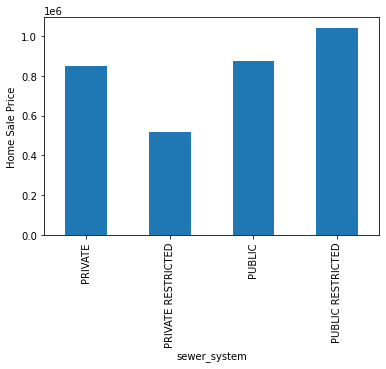

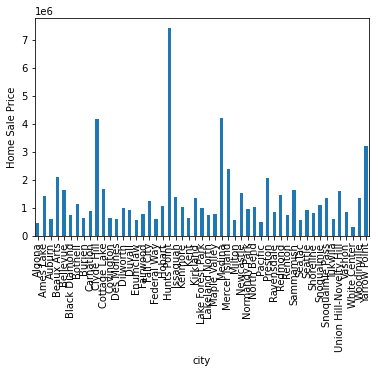

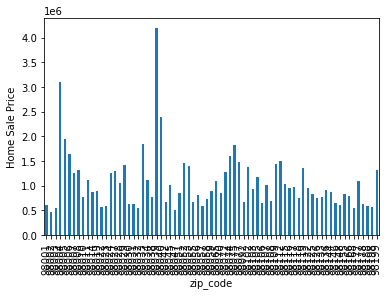

In [63]:
for feature in cate_features:
    data=wa_only_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

In [64]:
# removing more columns that we will not be using in analysis
wa_only_df = wa_only_df.drop(columns=['sqft_lot', 'nuisance', 'greenbelt', 'heat_source', 'sewer_system'])
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,...,1600,1130,0,210,1921,0,47.66,-122.33,Seattle,98103
30151,194000695,2021-06-16,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,...,2020,0,0,520,2011,0,47.57,-122.39,Seattle,98116
30152,7960100080,2022-05-27,800000.00,3,2.00,1620,1.00,NO,NONE,Average,...,940,920,240,110,1995,0,47.61,-122.30,Seattle,98122
30153,2781280080,2022-02-24,775000.00,3,2.50,2570,2.00,NO,NONE,Average,...,1830,740,480,100,2006,0,47.45,-122.19,Renton,98055


Preparing cleaned King County dataframe to be merged with mortgage rates. We will do this by changing the date value type to match the date value type in the mortgage df.

In [65]:
# copying cleaned king county dataset to merge with mortgage rates
sales_df = wa_only_df
sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,98027


In [66]:
# changing format of date column to match before merge
sales_df['date'] = sales_df['date'].dt.strftime('%B %Y')
sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,city,zip_code
0,7399300360,May 2022,675000.00,4,1.00,1180,1.00,NO,NONE,Good,...,1180,0,0,40,1969,0,47.46,-122.19,Renton,98055
1,8910500230,December 2021,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,...,1570,1570,0,240,1950,0,47.71,-122.36,Seattle,98133
2,1180000275,September 2021,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,...,1580,1580,0,0,1956,0,47.50,-122.23,Seattle,98178
3,1604601802,December 2021,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,...,1090,1070,200,270,2010,0,47.57,-122.29,Seattle,98118
4,8562780790,August 2021,592500.00,2,2.00,1120,2.00,NO,NONE,Average,...,1120,550,550,30,2012,0,47.53,-122.07,Issaquah,98027


In [67]:
# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
sales_df['mortgage_rate'] = sales_df.apply(lambda x: mortg.loc[mortg['month'] == x['date'],
                                                               'mortgage_rate'].values[0] 
                                           if mortg['month'].isin([x['date']]).any() 
                                           else 
                                               None, axis=1)

In [68]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29124 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29124 non-null  int64  
 1   date           29124 non-null  object 
 2   price          29124 non-null  float64
 3   bedrooms       29124 non-null  int64  
 4   bathrooms      29124 non-null  float64
 5   sqft_living    29124 non-null  int64  
 6   floors         29124 non-null  float64
 7   waterfront     29124 non-null  object 
 8   view           29124 non-null  object 
 9   condition      29124 non-null  object 
 10  grade          29124 non-null  object 
 11  sqft_above     29124 non-null  int64  
 12  sqft_basement  29124 non-null  int64  
 13  sqft_garage    29124 non-null  int64  
 14  sqft_patio     29124 non-null  int64  
 15  yr_built       29124 non-null  int64  
 16  yr_renovated   29124 non-null  int64  
 17  lat            29124 non-null  float64
 18  long  

<AxesSubplot:>

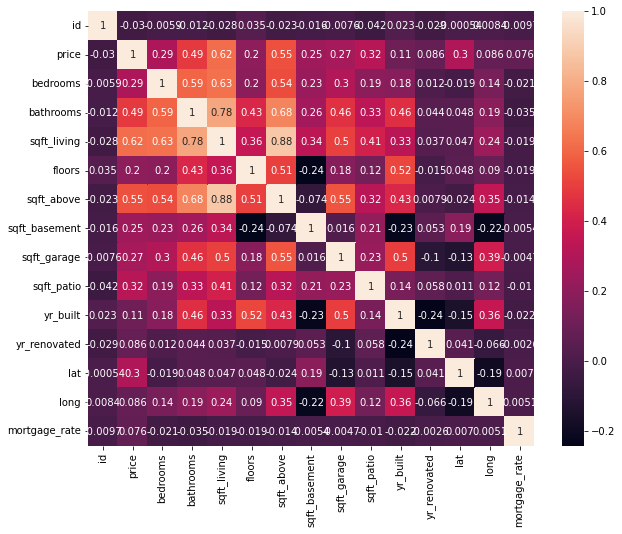

In [69]:
# looking at correlations
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sales_df.corr(), annot=True)

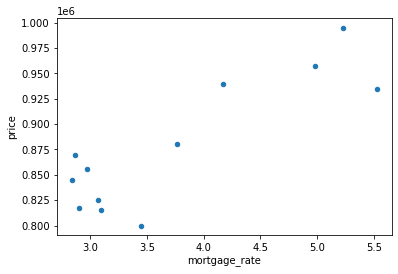

In [70]:
#looking at distribution of mortgage rates
sales_df.groupby('mortgage_rate', as_index = False)['price'].median().plot.scatter(x='mortgage_rate', y='price');

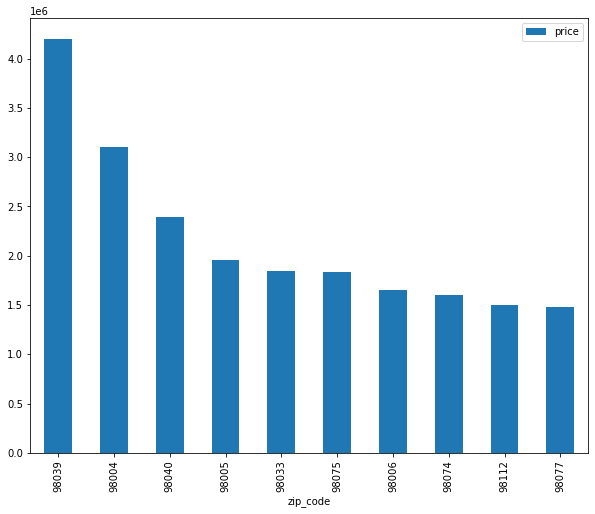

In [71]:
zip_group = sales_df.groupby('zip_code')['price'].median().sort_values(ascending=False)
top_zip = pd.DataFrame(zip_group.head(10))
top_zip.plot(kind='bar', figsize=(10,8));

The zipcode with the highest median price is Media, WA. 

## Data Modeling

### Simple Regression
For our simple regression model, we will be using sqft_living as it was the most correlated to our target.

In [72]:
# simple model
Y = sales_df['price']
X = sm.add_constant(sales_df['sqft_living'])

wa_simple = sm.OLS(endog=Y, exog=X).fit()
wa_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.786e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:04   Log-Likelihood:            -4.3353e+05
No. Observations:               29124   AIC:                         8.671e+05
Df Residuals:                   29122   BIC:                         8.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.216e+04   9926.528     -9.284      0.000   -1.12e+05   -7.27e+04
sqft_living   565.5723      4.232    133.631      0.000     557.277     573.868
==============================================================================
Omnibus:                    42148.981   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49881506.501
Skew:                           8.235   Prob(JB):                         0.00
Kurtosis:                     205.075   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

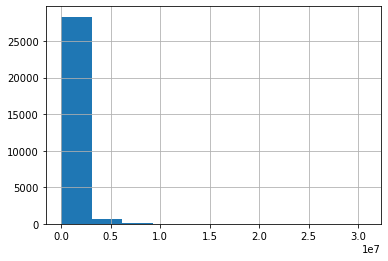

In [73]:
# looking at target distribution
Y.hist();

Our target is slightly right skewed, we will see how taking the log affects the distribution and model.

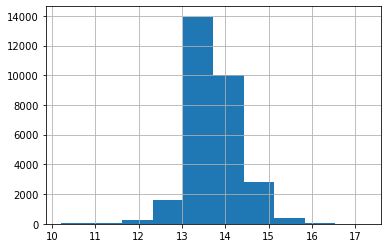

In [74]:
Y_log = np.log(Y)
Y_log.hist();

In [75]:
wa_simple_log = sm.OLS(endog=Y_log, exog=X).fit()
wa_simple_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:06   Log-Likelihood:                -18507.
No. Observations:               29124   AIC:                         3.702e+04
Df Residuals:                   29122   BIC:                         3.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9417      0.006   2013.345      0.000      12.929      12.954
sqft_living     0.0004   2.74e-06    136.469      0.000       0.000       0.000
==============================================================================
Omnibus:                     5786.463   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45411.433
Skew:                          -0.743   Prob(JB):                         0.00
Kurtosis:                       8.934   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There does not seem to be any improvement in the model after the log.

### Multiple Numerical Regression

In [76]:
# creating new dataframe with numeric colums
numeric_df = sales_df.select_dtypes(include=['float','int64'])
numeric_df

,id,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,mortgage_rate
0,7399300360,675000.00,4,1.00,1180,1.00,1180,0,0,40,1969,0,47.46,-122.19,5.23
1,8910500230,920000.00,5,2.50,2770,1.00,1570,1570,0,240,1950,0,47.71,-122.36,3.10
2,1180000275,311000.00,6,2.00,2880,1.00,1580,1580,0,0,1956,0,47.50,-122.23,2.90
3,1604601802,775000.00,3,3.00,2160,2.00,1090,1070,200,270,2010,0,47.57,-122.29,3.10
4,8562780790,592500.00,2,2.00,1120,2.00,1120,550,550,30,2012,0,47.53,-122.07,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.00,5,2.00,1910,1.50,1600,1130,0,210,1921,0,47.66,-122.33,3.07
30151,194000695,1313000.00,3,2.00,2020,2.00,2020,0,0,520,2011,0,47.57,-122.39,2.98
30152,7960100080,800000.00,3,2.00,1620,1.00,940,920,240,110,1995,0,47.61,-122.30,5.23
30153,2781280080,775000.00,3,2.50,2570,2.00,1830,740,480,100,2006,0,47.45,-122.19,3.76


In [77]:
# separting data frame into model variables
num_mlr_y = numeric_df['price']
num_mlr_x = numeric_df.drop('price', axis=1)
num_mlr_x.head()

,id,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,mortgage_rate
0,7399300360,4,1.00,1180,1.00,1180,0,0,40,1969,0,47.46,-122.19,5.23
1,8910500230,5,2.50,2770,1.00,1570,1570,0,240,1950,0,47.71,-122.36,3.10
2,1180000275,6,2.00,2880,1.00,1580,1580,0,0,1956,0,47.50,-122.23,2.90
3,1604601802,3,3.00,2160,2.00,1090,1070,200,270,2010,0,47.57,-122.29,3.10
4,8562780790,2,2.00,1120,2.00,1120,550,550,30,2012,0,47.53,-122.07,2.84


In [78]:
# multiple regression model on numeric variables
num_mlr = sm.OLS(endog=num_mlr_y, exog=sm.add_constant(num_mlr_x)).fit()
num_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2007.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:08   Log-Likelihood:            -4.3065e+05
No. Observations:               29124   AIC:                         8.613e+05
Df Residuals:                   29109   BIC:                         8.615e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.056e+07   4.02e+06    -20.039      0.000   -8.84e+07   -7.27e+07
id            -9.885e-07    1.3e-06     -0.758      0.448   -3.54e-06    1.57e-06
bedrooms      -1.393e+05   5152.349    -27.034      0.000   -1.49e+05   -1.29e+05
bathrooms      1.164e+05   7643.727     15.229      0.000    1.01e+05    1.31e+05
sqft_living     327.5058     17.148     19.099      0.000     293.895     361.117
floors        -1.027e+05   9707.561    -10.579      0.000   -1.22e+05   -8.37e+04
sqft_above      298.5154     17.496     17.062      0.000     264.222     332.809
sqft_basement    83.4362     13.014      6.411      0.000      57.928     108.944
sqft_garage     -42.3526     18.226     -2.324      0.020     -78.076      -6.629
sqft_patio      274.2914     16.877     16.253      0.000     241.212     307.371
yr_built      -1930.5166    180.965    -10.668      0.000   -2285.217   -1575.817
yr_renovated     65.1105      9.377      6.944      0.000      46.731      83.490
lat             1.57e+06   2.71e+04     58.002      0.000    1.52e+06    1.62e+06
long          -7.829e+04   3.13e+04     -2.504      0.012    -1.4e+05    -1.7e+04
mortgage_rate  8.881e+04   4413.726     20.121      0.000    8.02e+04    9.75e+04
==============================================================================
Omnibus:                    45775.508   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83377820.874
Skew:                           9.641   Prob(JB):                         0.00
Kurtosis:                     264.413   Cond. No.                     5.77e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above was the basic numeric model, we will log our target and scale numeric features to check for improvement.

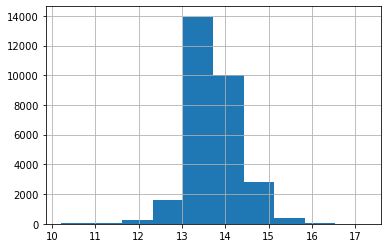

In [79]:
# log of target for second model transformation
num_mlr_y_log = np.log(num_mlr_y)
num_mlr_y_log.hist();

In [80]:
# scaling x
num_mlr_x_sld = (num_mlr_x - np.mean(num_mlr_x)) / np.std(num_mlr_x)
num_mlr_x_sld

,id,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,mortgage_rate
0,0.99,0.58,-1.49,-0.98,-0.94,-0.73,-0.82,-1.18,-0.72,-0.15,-0.22,-0.56,0.17,2.01
1,1.52,1.60,0.19,0.65,-0.94,-0.29,1.86,-1.18,0.10,-0.75,-0.22,1.15,-1.00,-0.50
2,-1.17,2.62,-0.37,0.77,-0.94,-0.28,1.87,-1.18,-0.88,-0.56,-0.22,-0.28,-0.07,-0.73
3,-1.02,-0.45,0.75,0.03,0.88,-0.84,1.00,-0.48,0.22,1.14,-0.22,0.16,-0.53,-0.50
4,1.40,-1.47,-0.37,-1.04,0.88,-0.80,0.12,0.75,-0.76,1.21,-0.22,-0.07,1.01,-0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1.14,1.60,-0.37,-0.23,-0.03,-0.26,1.11,-1.18,-0.03,-1.67,-0.22,0.83,-0.81,-0.54
30151,-1.51,-0.45,-0.37,-0.12,0.88,0.22,-0.82,-1.18,1.23,1.17,-0.22,0.15,-1.23,-0.65
30152,1.19,-0.45,-0.37,-0.52,-0.94,-1.01,0.75,-0.34,-0.43,0.67,-0.22,0.46,-0.57,2.01
30153,-0.61,-0.45,0.19,0.45,0.88,0.00,0.44,0.50,-0.47,1.02,-0.22,-0.64,0.18,0.28


In [81]:
# log y and scaled x
predictors = sm.add_constant(num_mlr_x_sld)
num_mlr_scld= sm.OLS(endog=num_mlr_y_log, exog=predictors).fit()
num_mlr_scld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2866.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:09   Log-Likelihood:                -13088.
No. Observations:               29124   AIC:                         2.621e+04
Df Residuals:                   29109   BIC:                         2.633e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7393      0.002   6180.740      0.000      13.735      13.744
id               -0.0005      0.002     -0.217      0.828      -0.005       0.004
bedrooms         -0.0326      0.003    -10.914      0.000      -0.038      -0.027
bathrooms         0.0698      0.004     17.209      0.000       0.062       0.078
sqft_living       0.2048      0.010     20.611      0.000       0.185       0.224
floors            0.0113      0.003      3.578      0.000       0.005       0.017
sqft_above        0.0994      0.009     10.877      0.000       0.081       0.117
sqft_basement     0.0203      0.005      4.478      0.000       0.011       0.029
sqft_garage       0.0173      0.003      5.575      0.000       0.011       0.023
sqft_patio        0.0403      0.002     16.344      0.000       0.036       0.045
yr_built         -0.0459      0.003    -13.506      0.000      -0.053      -0.039
yr_renovated      0.0147      0.002      6.271      0.000       0.010       0.019
lat               0.2337      0.002     99.697      0.000       0.229       0.238
long              0.0326      0.003     12.444      0.000       0.027       0.038
mortgage_rate     0.0677      0.002     30.428      0.000       0.063       0.072
==============================================================================
Omnibus:                    11285.692   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216456.807
Skew:                          -1.382   Prob(JB):                         0.00
Kurtosis:                      16.067   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model Adjusted R 

### Categorical Features Models

We will be creating a multi linear regression model with categroical variables by breaking them out.

In [82]:
# dropping columns before categorical model
dummy_sales_df = sales_df.drop(columns=['date', 'city', 'sqft_garage', 'sqft_above'])

In [83]:
dummy_sales_df['zip_code']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zip_code, Length: 29124, dtype: object

In [84]:
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29124 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29124 non-null  int64  
 1   price          29124 non-null  float64
 2   bedrooms       29124 non-null  int64  
 3   bathrooms      29124 non-null  float64
 4   sqft_living    29124 non-null  int64  
 5   floors         29124 non-null  float64
 6   waterfront     29124 non-null  object 
 7   view           29124 non-null  object 
 8   condition      29124 non-null  object 
 9   grade          29124 non-null  object 
 10  sqft_basement  29124 non-null  int64  
 11  sqft_patio     29124 non-null  int64  
 12  yr_built       29124 non-null  int64  
 13  yr_renovated   29124 non-null  int64  
 14  lat            29124 non-null  float64
 15  long           29124 non-null  float64
 16  zip_code       29124 non-null  object 
 17  mortgage_rate  29124 non-null  float64
dtypes: flo

In [85]:
#slightly adjusting the model to remove extreme outliers

dummy_sales_df = dummy_sales_df.loc[(dummy_sales_df['price'] < 10000000) &
                                    (dummy_sales_df['price'] > 100000)]
dummy_sales_df
                                    

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,sqft_patio,yr_built,yr_renovated,lat,long,zip_code,mortgage_rate
0,7399300360,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,0,40,1969,0,47.46,-122.19,98055,5.23
1,8910500230,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,240,1950,0,47.71,-122.36,98133,3.10
2,1180000275,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,0,1956,0,47.50,-122.23,98178,2.90
3,1604601802,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1070,270,2010,0,47.57,-122.29,98118,3.10
4,8562780790,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,550,30,2012,0,47.53,-122.07,98027,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,8 Good,1130,210,1921,0,47.66,-122.33,98103,3.07
30151,194000695,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,7 Average,0,520,2011,0,47.57,-122.39,98116,2.98
30152,7960100080,800000.00,3,2.00,1620,1.00,NO,NONE,Average,7 Average,920,110,1995,0,47.61,-122.30,98122,5.23
30153,2781280080,775000.00,3,2.50,2570,2.00,NO,NONE,Average,8 Good,740,100,2006,0,47.45,-122.19,98055,3.76


In [86]:
cat_dummies = pd.get_dummies(dummy_sales_df, drop_first=True)
cat_dummies

,id,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,yr_built,yr_renovated,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
0,7399300360,675000.00,4,1.00,1180,1.00,0,40,1969,0,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,920000.00,5,2.50,2770,1.00,1570,240,1950,0,...,0,0,0,0,0,0,0,0,0,0
2,1180000275,311000.00,6,2.00,2880,1.00,1580,0,1956,0,...,0,0,0,0,0,0,1,0,0,0
3,1604601802,775000.00,3,3.00,2160,2.00,1070,270,2010,0,...,0,0,0,0,0,0,0,0,0,0
4,8562780790,592500.00,2,2.00,1120,2.00,550,30,2012,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.00,5,2.00,1910,1.50,1130,210,1921,0,...,0,0,0,0,0,0,0,0,0,0
30151,194000695,1313000.00,3,2.00,2020,2.00,0,520,2011,0,...,0,0,0,0,0,0,0,0,0,0
30152,7960100080,800000.00,3,2.00,1620,1.00,920,110,1995,0,...,0,0,0,0,0,0,0,0,0,0
30153,2781280080,775000.00,3,2.50,2570,2.00,740,100,2006,0,...,0,0,0,0,0,0,0,0,0,0


Below is a list of the dummy categories that were dropped and that will serve as our baseline.

In [87]:
# water dummy, drops NO
# view dummy, drops AVERAGE
# condition dummy, drops AVERAGE
# grade dummy, drops 10 Very Good
# zip dummy, drops 98001

In [88]:
# categorical model 1 - before log and scale
y = cat_dummies['price']
x = cat_dummies.drop('price', axis=1)
cat_model = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
print(cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     828.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:13   Log-Likelihood:            -4.1503e+05
No. Observations:               29011   AIC:                         8.303e+05
Df Residuals:                   28906   BIC:                         8.311e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.38e+08   1

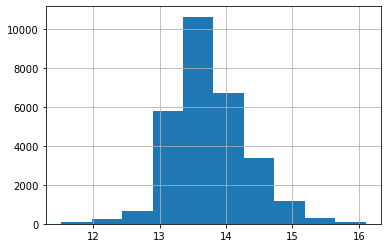

In [89]:
y_log = np.log(y)
y_log.hist();

In [90]:
x_sld = (x - np.mean(x)) / np.std(x)
x_sld

,id,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,yr_built,yr_renovated,lat,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
0,0.99,0.58,-1.50,-0.98,-0.94,-0.82,-0.72,-0.15,-0.22,-0.56,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
1,1.52,1.60,0.19,0.66,-0.94,1.87,0.10,-0.75,-0.22,1.15,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
2,-1.17,2.63,-0.37,0.78,-0.94,1.89,-0.88,-0.56,-0.22,-0.28,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,8.66,-0.08,-0.12,-0.12
3,-1.02,-0.45,0.75,0.03,0.88,1.01,0.22,1.14,-0.22,0.16,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
4,1.40,-1.47,-0.37,-1.04,0.88,0.12,-0.76,1.20,-0.22,-0.07,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1.14,1.60,-0.37,-0.23,-0.03,1.11,-0.02,-1.67,-0.22,0.83,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30151,-1.51,-0.45,-0.37,-0.11,0.88,-0.82,1.24,1.17,-0.22,0.15,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30152,1.19,-0.45,-0.37,-0.53,-0.94,0.75,-0.43,0.67,-0.22,0.46,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30153,-0.61,-0.45,0.19,0.46,0.88,0.45,-0.47,1.01,-0.22,-0.64,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12


In [91]:
# final: categorical  model 2 - ylog and xscaled
preds = sm.add_constant(x_sld)
updated_model = sm.OLS(endog=y_log, exog=preds).fit()
print(updated_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     856.9
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:31:14   Log-Likelihood:                -3970.8
No. Observations:               29011   AIC:                             8152.
Df Residuals:                   28906   BIC:                             9020.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.7450    

Our final model seems to have improved with an adjusted R-Square of 0.75 and a cond. number of 13.4.

In [92]:
# most positive coef
coef = updated_model.params.sort_values(ascending=False).reset_index()
coef_df = pd.DataFrame(coef)
coef_df.head(10)

,index,0
0,const,13.74
1,sqft_living,0.20
2,zip_code_98033,0.11
3,zip_code_98004,0.10
4,lat,0.09
5,zip_code_98052,0.08
6,zip_code_98006,0.08
7,zip_code_98040,0.08
8,zip_code_98075,0.07
9,zip_code_98008,0.07


In [93]:
# most negative coef
coef_df.tail(10)

,index,0
95,floors,-0.02
96,grade_4 Low,-0.02
97,grade_9 Better,-0.02
98,sqft_basement,-0.03
99,view_NONE,-0.03
100,long,-0.04
101,grade_5 Fair,-0.05
102,grade_8 Good,-0.09
103,grade_6 Low Average,-0.12
104,grade_7 Average,-0.15


In [94]:
##looking at outliers

y_4 = cat_dummies['price']

#finding outliers using 1.5 IQR

Q1 = np.percentile(y_4, 25)

Q3 = np.percentile(y_4, 75)

#IQR formula
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-343007.5
2305004.5


## Evaluation

### Linearity Check

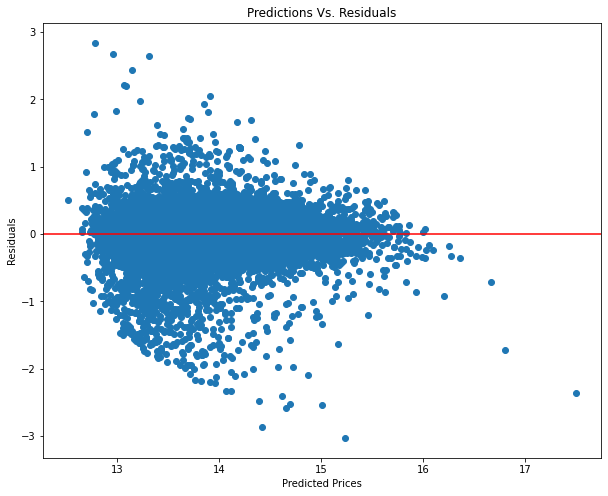

In [95]:
model_preds = updated_model.predict(preds)
# residuals - error (diff. from real points (y_log) to predict points (preds))
reds = y_log - model_preds

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(model_preds, reds)
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals')
ax.set_title('Predictions Vs. Residuals')
plt.axhline(y=0.0, color='r', linestyle='-');

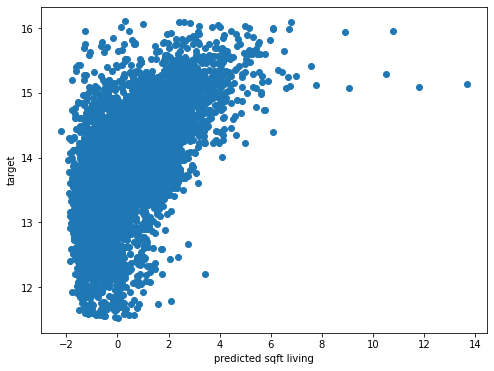

In [96]:
# target vs 1 predictor
fig, ax = plt.subplots( figsize=(8,6))
ax.scatter(preds['sqft_living'], y_log)
ax.set_xlabel('predicted sqft living')
ax.set_ylabel('target');

### Independence Check

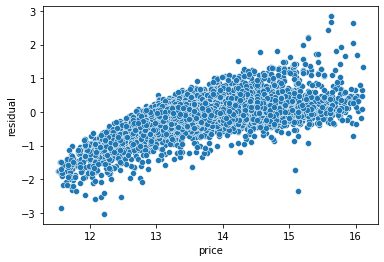

In [97]:
# scatterplot
sns.scatterplot(y=reds, x=y_log);
plt.ylabel('residual');

In [98]:
# db test
dw = sm.stats.stattools.durbin_watson
dw(reds)

1.9569955120574758

Very small positive correlation

### Normality Check

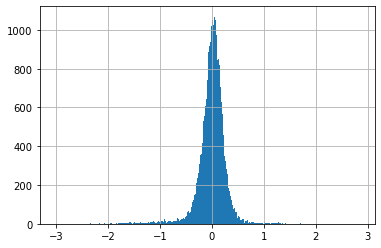

In [99]:
reds.hist(bins='auto');

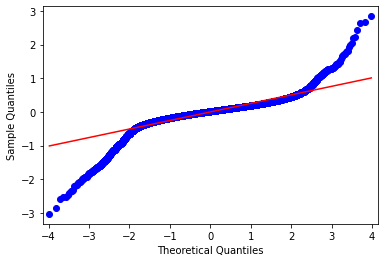

In [100]:
sm.qqplot(data=reds, line='r');

In [101]:
updated_model.summary().tables[2]

Omnibus:,11636.744,Durbin-Watson:,1.957
Prob(Omnibus):,0.000,Jarque-Bera (JB):,241638.067
Skew:,-1.425,Prob(JB):,0.00
Kurtosis:,16.848,Cond. No.,39.7


### Homoskedasticity Check

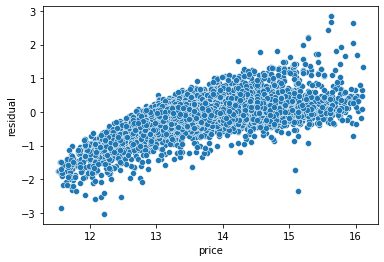

In [102]:
sns.scatterplot(x=y_log, y=reds)
plt.ylabel('residual');

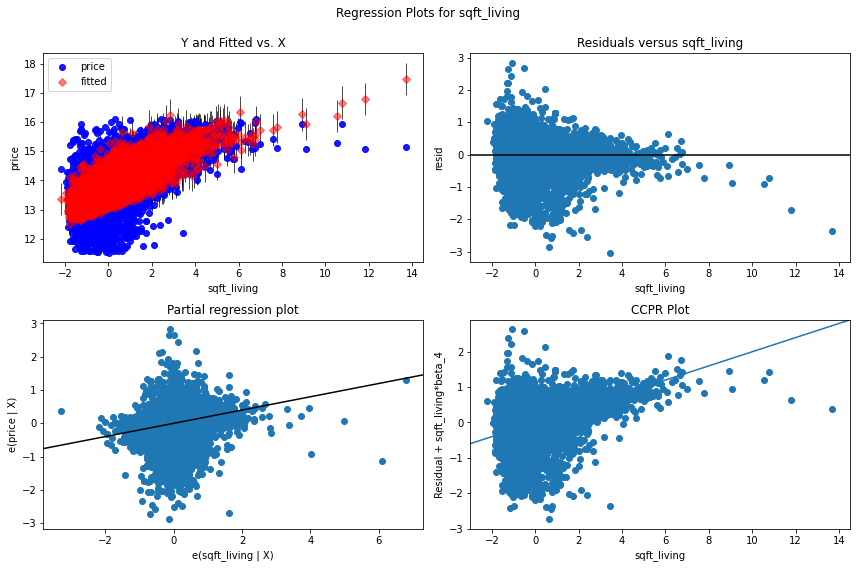

In [103]:
sm.graphics.plot_regress_exog(updated_model, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

In [104]:
# model coefficient and std of numeric feature
updated_model.params.sqft_living, np.std(dummy_sales_df['sqft_living'])

# calculating impact of sqft_living coefficient on price
print(f"""
A one-unit increase in the square footage or approximately 
{round(np.std(dummy_sales_df['sqft_living'])
, 1)} squared feet, corresponds
to an increase in price by a factor of {round(np.exp(updated_model.params.sqft_living), 4)},
or {100 * round(np.exp(updated_model.params.sqft_living) - 1, 4)}%.
""")


A one-unit increase in the square footage or approximately 
966.5 squared feet, corresponds
to an increase in price by a factor of 1.2209,
or 22.09%.



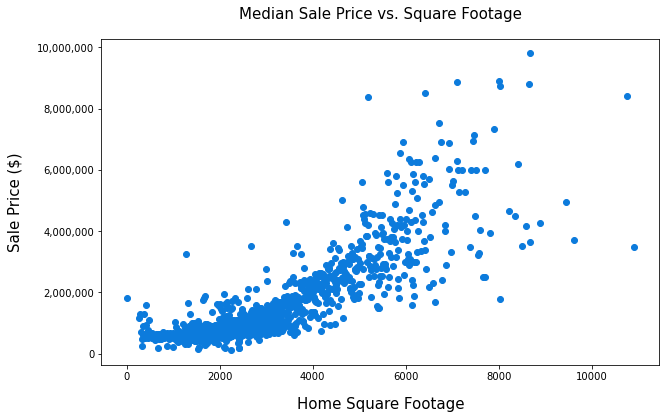

In [115]:
# grouping zip codes and getting median price 
size_df = dummy_sales_df.groupby('sqft_living', as_index=False).median()
size_df = size_df.loc[(size_df['price'] < 10000000) & (size_df['sqft_living'] < 12000) ]

# median price vs zip code
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y=size_df['price'], x=size_df['sqft_living'], marker='o', c='#0C7BDC')

#naming labels
ax.set_xlabel('Home Square Footage', labelpad=15, fontsize=15)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=15)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Median Sale Price vs. Square Footage', pad=20, fontsize=15)
#plt.savefig('Images/median_sqft_vs_price.png', dpi=600)

In [109]:
updated_model.params.zip_code_98002

# calculating impact of zipcode 98002 to price when comparing to 98001
print(f"""
From our base zip code to 98002 or Auburn, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98002), 4)},
or {100 * round(np.exp(updated_model.params.zip_code_98002) - 1, 4)}%.
""")

updated_model.params.zip_code_98033

# calculating impact of zipcode 98033 to price when comparing to 98001
print(f"""
From our base zip code to 98033 or Kirkland, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98033), 4)},
or {100 * round(np.exp(updated_model.params.zip_code_98033) - 1, 4)}%.
""")


From our base zip code to 98002 or Auburn, we see
a price change by a factor of 0.9914,
or -0.86%.


From our base zip code to 98033 or Kirkland, we see
a price change by a factor of 1.1138,
or 11.379999999999999%.



Text(0.5, 1.0, 'Median Sale Price By Zip Code')

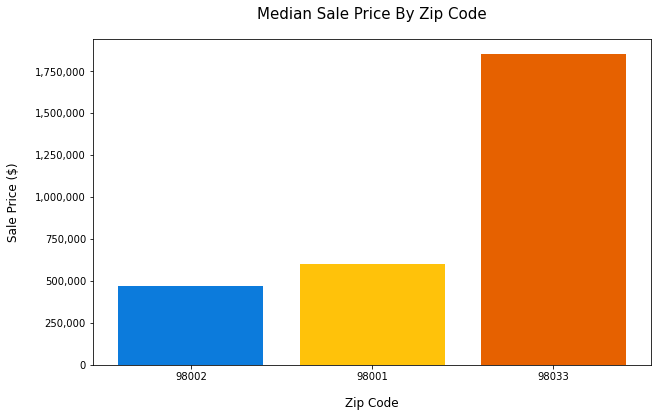

In [110]:
# creating df of meadian prices to plot 
zip_df = dummy_sales_df.loc[(dummy_sales_df['zip_code'] == '98001')|
                            (dummy_sales_df['zip_code'] == '98033') |
                            (dummy_sales_df['zip_code'] == '98002')]

zip_group = zip_df.groupby('zip_code', as_index=False).median().sort_values(by='price')

# median price vs zip code
color = ['#0C7BDC', '#FFC20A','#E66100'] 
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(height=zip_group['price'], x=zip_group['zip_code'], color = color)

#naming labels
ax.set_xlabel('Zip Code', labelpad=15, fontsize=12)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=12)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Median Sale Price By Zip Code', pad=20, fontsize=15)

In [111]:

# calculating impact of changing construction grade to 7 to price when comparing to
# grade 10   
print(f"""
From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of {round(np.exp( -0.1428), 4)},
or {100 * round(np.exp( -0.1428) - 1, 4)}%.
""") 



From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of 0.8669,
or -13.309999999999999%.



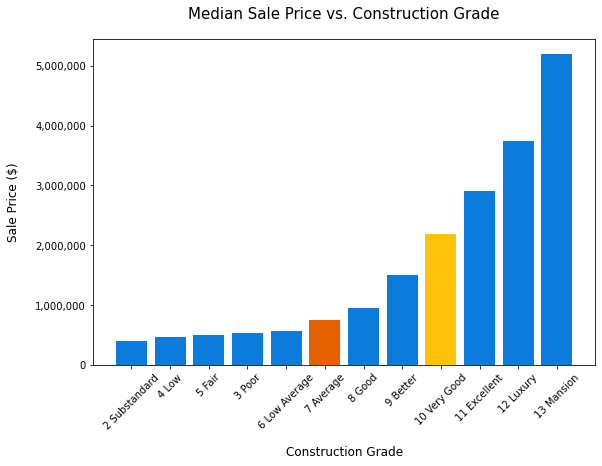

In [112]:
# # creating df of meadian prices to plot 
grades = dummy_sales_df.groupby('grade', as_index=False).median().sort_values(by='price')

# plot of median price vs grade
colors = ['#0C7BDC', '#0C7BDC','#0C7BDC','#0C7BDC','#0C7BDC','#E66100','#0C7BDC','#0C7BDC',
          '#FFC20A','#0C7BDC','#0C7BDC','#0C7BDC',] 
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(height=grades['price'], x=grades['grade'], color=colors)


#addint labels
ax.set_xlabel('Construction Grade', labelpad=15, fontsize=12)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=12)
ax.set_title('Median Sale Price vs. Construction Grade', pad=20, fontsize=15)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45);

## Conclusions


As a result of this analysis, three variables have been identified that can impact prices and should be taken into consideration when researching potential investment properties:

**Home Size**

Increasing footage of home by approximately 964sq.ft increases the price by a factor of 1.227 or 22.7%.

**Location**

Comparing to our baseline zip code 98001 which corresponds to Federal Way city, moving to zip codes that are north and with more proximity to Seattle and more uban cities such as Kirkland (98033) increases the sale price by 22.7%.
Alternatively, staying close to Federal Way and away from Seattle, sale prices slightly decrease. As we can see by the comparison to zip code 98002 which corresponds to Auburn city which decreased price by 1.04% .

**Construction Grade**

We can see that construction grade quality can negatively affect prices. Lower construction quality is associated with a decrease in sale price, as we can see going from 10 to 7 decreases prices by 13.3%.

## Next Steps

To gain a more comprehensive understanding of changing home prices, it would be beneficial to analyze additional historical home sale data beyond the current dataset that only spans 12 months. Reviewing home sales over the past 5-10 years can provide insights into how the housing market has evolved.

In addition to historical data, conducting further analyses of environmental variables can enhance our understanding of residential home prices and should be taken into consideration. Some factors to consider include:

- School district ratings and locations
- Tax data
- Population data